# CASE STUDY - 2:

## DATA EXPLORATORY ANALYSIS FOR CREDIT CARD DATA

In [2]:
# import all necessary packages

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the data and performing data joins

customer_acq = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")

repayment = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv")

repayment = repayment.iloc[0:1500,0:4].rename(columns = { "SL No:" : "SL No:", "Customer": "Customer", "Month" : "repayment_month", "Amount": "repayment_amount"})                                   

spend = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv")

spend= spend.rename(columns = { "Sl No:": "Sl No:", "Customer": "Customer", "Month": "spend_month" , "Type": "Type", "Amount": "spend_amount"})


customer = customer_acq.merge(repayment, how='inner', left_on=["Customer"], right_on=["Customer"])

customer = customer.merge(spend, how='inner', left_on=["Customer"], right_on=["Customer"])

customer.drop(axis = 0, columns = ["No", "SL No:", "Sl No:"], inplace = True)

customer

,Customer,Age,City,Product,Limit,Company,Segment,repayment_month,repayment_amount,spend_month,Type,spend_amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,12-Jan-04,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,3-Jan-04,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,15-Jan-04,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,25-Jan-04,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30,25-Jan-04,BIKE,54729.66
37280,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90,12-Jan-04,AUTO,139018.26
37281,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57,3-Jan-04,SHOPPING,284521.06
37282,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73,15-Jan-04,AIR TICKET,90184.22


# 1. In the above dataset,

a. In case age is less than 18, replace it with mean of age values.

b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

c. Incase the repayment amount is more than the limit, replace the repayment with the
limit.

In [4]:
# a. In case age is less than 18, replace it with mean of age values

customer[customer["Age"] == 18]

,Customer,Age,City,Product,Limit,Company,Segment,repayment_month,repayment_amount,spend_month,Type,spend_amount


In [5]:
# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

customer["spend_amount"][customer["spend_amount"] > customer["Limit"]] = ((customer["Limit"]*50)/100)

customer

<ipython-input-5-baba8df167f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer["spend_amount"][customer["spend_amount"] > customer["Limit"]] = ((customer["Limit"]*50)/100)


,Customer,Age,City,Product,Limit,Company,Segment,repayment_month,repayment_amount,spend_month,Type,spend_amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,12-Jan-04,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,3-Jan-04,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,15-Jan-04,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,25-Jan-04,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30,25-Jan-04,BIKE,54729.66
37280,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90,12-Jan-04,AUTO,5000.00
37281,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57,3-Jan-04,SHOPPING,5000.50
37282,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73,15-Jan-04,AIR TICKET,5001.00


In [6]:
# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

customer["repayment_amount"][customer["repayment_amount"] > customer["Limit"]] = customer["Limit"]

customer

<ipython-input-6-79a854e554db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer["repayment_amount"][customer["repayment_amount"] > customer["Limit"]] = customer["Limit"]


,Customer,Age,City,Product,Limit,Company,Segment,repayment_month,repayment_amount,spend_month,Type,spend_amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,12-Jan-04,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,3-Jan-04,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,15-Jan-04,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,25-Jan-04,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,100000.00,25-Jan-04,BIKE,54729.66
37280,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,10000.00,12-Jan-04,AUTO,5000.00
37281,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,10001.00,3-Jan-04,SHOPPING,5000.50
37282,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,10002.00,15-Jan-04,AIR TICKET,5001.00


# 2. From the above dataset create the following summaries:
a. How many distinct customers exist?
b. How many distinct categories exist?
c. What is the average monthly spend by customers?
d. What is the average monthly repayment by customers?
e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)
f. What are the top 5 product types?
g. Which city is having maximum spend?
h. Which age group is spending more money?
i. Who are the top 10 customers in terms of repayment?

In [7]:
# a. How many distinct customers exist?

customer["Customer"].nunique()

100

In [8]:
#  b. How many distinct categories exist?

customer["Product"].nunique()

3

In [9]:
# c. What is the average monthly spend by customers

avg = customer[["spend_amount"]].mean()

print(f"Average monthly spend is {avg}")

Average monthly spend is spend_amount    154167.676151
dtype: float64


In [10]:
# d. What is the average monthly repayment by customers?

avg = customer[["repayment_amount"]].mean()

print(f"Average monthly repayment is {avg}")

Average monthly repayment is repayment_amount    170188.824169
dtype: float64


In [11]:
# e. If the monthly rate of interest is 2.9%, 
# what is the profit for the bank for each month? 
# (Profit is defined as interest earned on Monthly Profit. 
# Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

customer["repayment_month"] = pd.to_datetime(customer["repayment_month"])

customer["spend_month"] = pd.to_datetime(customer["spend_month"])

customer["profit"] = customer["repayment_amount"] - customer["spend_amount"]

cust_profit = customer[customer["profit"] > 0]


monthly_profit = (cust_profit["profit"]*1.029).sum()

monthly_profit

2378698078.81566

In [12]:
# f. What are the top 5 product types?

customer[["Type", "spend_amount"]].groupby(by = ["Type"])["spend_amount"].sum().reset_index().sort_values(["spend_amount"], ascending = False).head(5)



,Type,spend_amount
4,CAMERA,7.517011e+08
10,PETRO,7.071549e+08
7,FOOD,5.478835e+08
0,AIR TICKET,5.401180e+08
14,TRAIN TICKET,5.344239e+08


In [13]:
# g. Which city is having maximum spend? 

customer[["City", "spend_amount"]].groupby(by = ["City"])["spend_amount"].sum().reset_index().sort_values(["spend_amount"], ascending = False).head(1)

,City,spend_amount
4,COCHIN,1.175903e+09


In [14]:
# h. Which age group is spending more money?

customer[["Age", "spend_amount"]].groupby(by = ["Age"])["spend_amount"].sum().reset_index().sort_values(["spend_amount"], ascending = False).head(1)

,Age,spend_amount
10,28,6.154699e+08


In [15]:
# i. Who are the top 10 customers in terms of repayment

customer[["Customer", "spend_amount"]].groupby(by = ["Customer"])["spend_amount"].sum().reset_index().sort_values(["spend_amount"], ascending = False).head(10)

,Customer,spend_amount
57,A60,4.187954e+08
58,A61,3.420884e+08
32,A38,2.821869e+08
35,A40,2.809179e+08
5,A13,2.551798e+08
4,A12,2.536746e+08
33,A39,2.402658e+08
6,A14,2.374937e+08
37,A42,2.206030e+08
36,A41,2.193068e+08


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

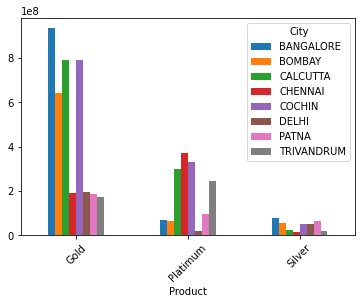

In [67]:
city_spend = customer[["City", "Product", "spend_amount"]].groupby(by = ["City", "Product"])["spend_amount"].sum().reset_index()

city_spend = pd.pivot_table(city_spend, values = ["spend_amount"]  , index=["Product"], columns=["City"], aggfunc= np.sum)

city_spend = city_spend.droplevel(level = 0, axis = 1).reset_index()

city_spend.plot(x = "Product", y = ["BANGALORE", "BOMBAY", "CALCUTTA", "CHENNAI", "COCHIN", "DELHI", "PATNA", "TRIVANDRUM"], kind = "bar")
plt.xticks(rotation = 45)
plt.show()


# 4. Create graphs for
a. Monthly comparison of total spends, city wise
b. Comparison of yearly spend on air tickets
c. Comparison of monthly spend for each product (look for any seasonality
that exists in terms of spend)

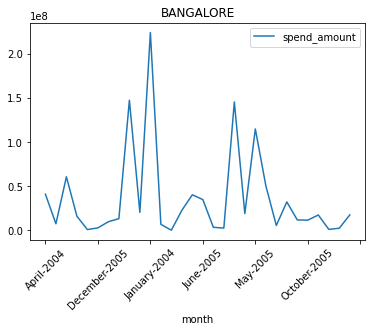

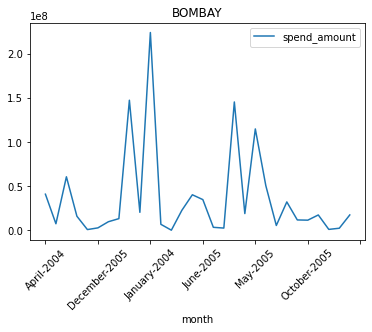

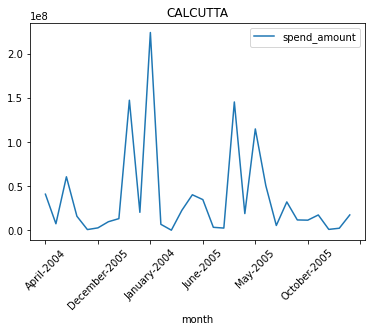

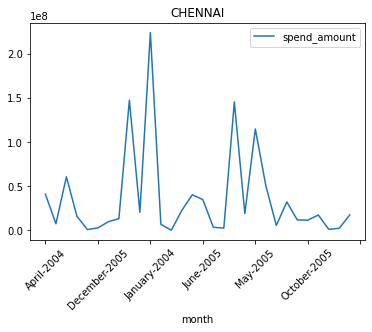

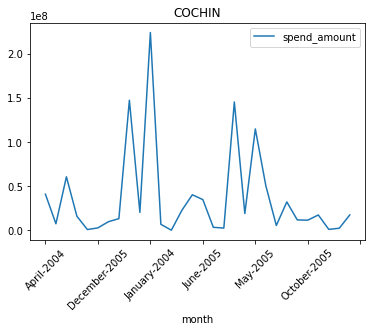

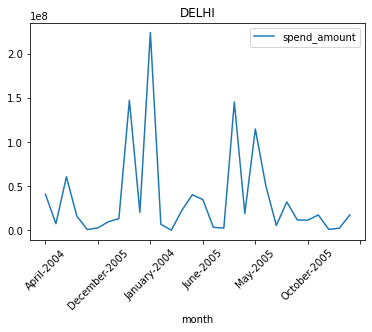

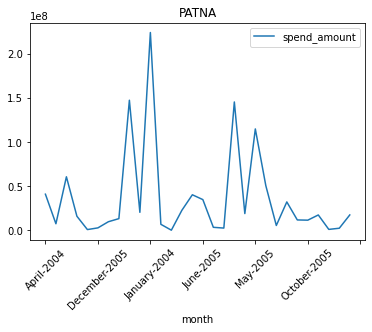

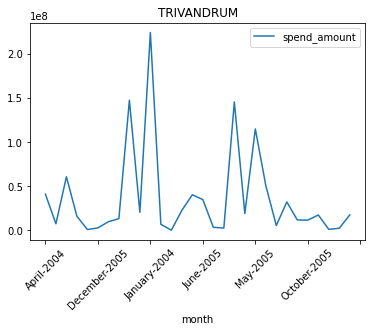

In [47]:
# a. Monthly comparison of total spends, city wise

month_spend = customer[["City", "spend_month", "spend_amount"]].groupby(by = ["City", "spend_month"])["spend_amount"].sum().reset_index()

month_spend["spend_month"] = pd.to_datetime(month_spend["spend_month"])

month_spend["month"] = month_spend["spend_month"].apply(lambda x: x.strftime("%B-%Y"))

month_spend = month_spend[["City", "month", "spend_amount"]].groupby(by = ["City", "month"])["spend_amount"].sum()

month_spend = month_spend.reset_index()

month_spend

for item in month_spend["City"].unique():
    month_spend[month_spend["City"] == "BANGALORE"].plot(x = "month", y = "spend_amount", kind = "line")
    plt.title(item)
    plt.xticks(rotation = 45)
    plt.show()

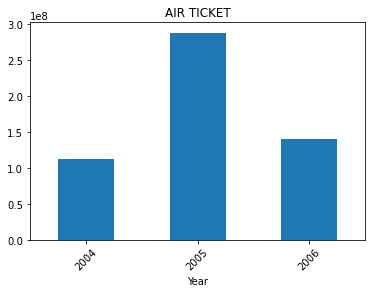

In [65]:
#  b. Comparison of yearly spend on air tickets

ticket = customer[["Type", "spend_month", "spend_amount"]][customer["Type"] == "AIR TICKET"]

ticket["Year"] = ticket["spend_month"].apply(lambda x: x.strftime("%Y"))

ticket_year = ticket.groupby(by = ["Year"])["spend_amount"].sum()

ticket_year.plot(x = "Year", y = "spend_amount", kind = "bar")
plt.title("AIR TICKET")
plt.xticks(rotation = 45)
plt.show()

<ipython-input-85-2963d96f13d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod["mnth_Yr"] = prod["spend_month"].apply(lambda x: x.strftime("%m-%Y"))


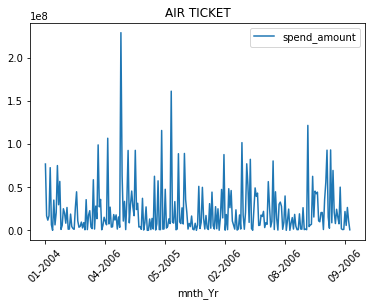

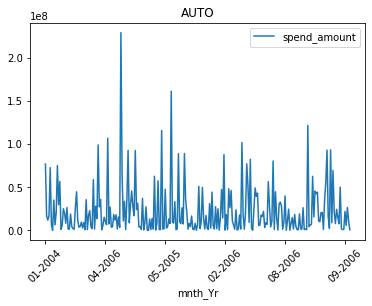

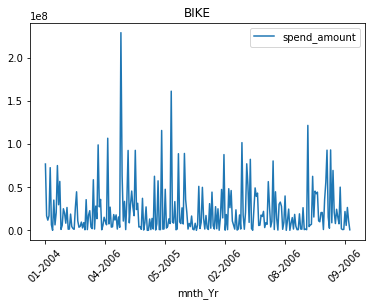

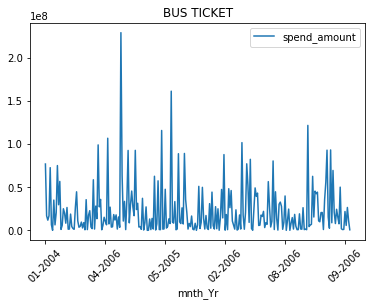

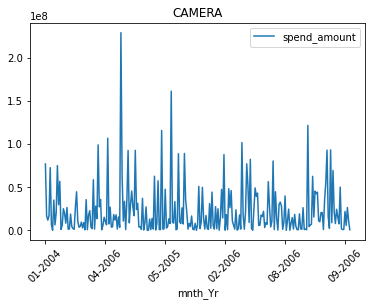

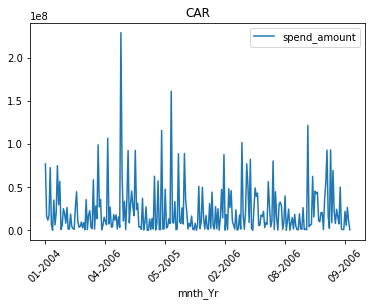

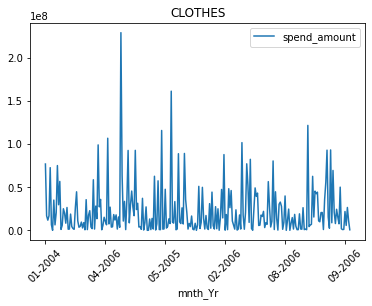

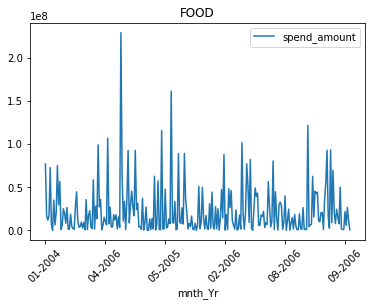

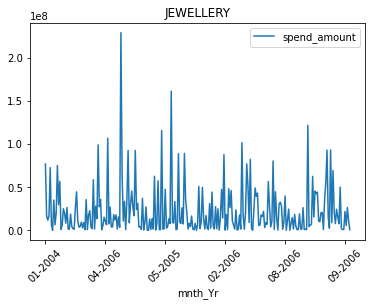

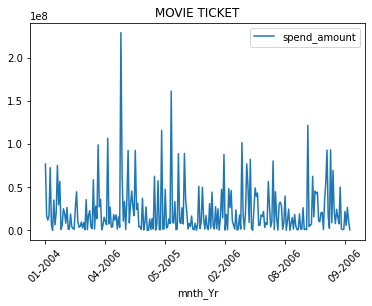

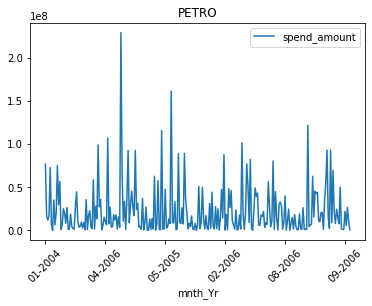

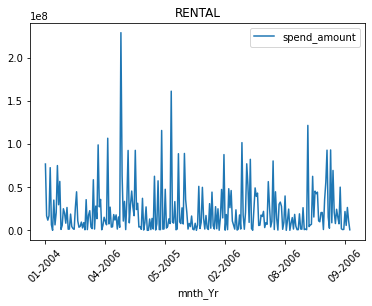

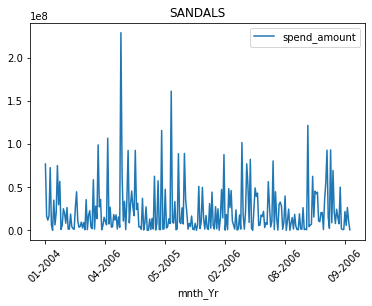

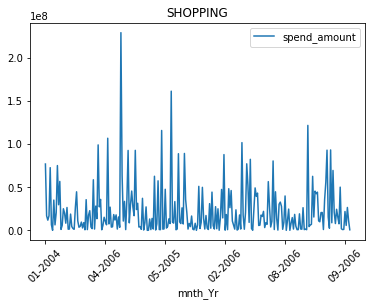

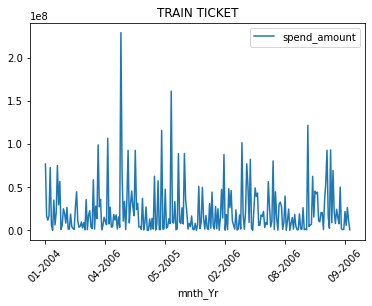

In [85]:
#  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

prod = customer[["Type", "spend_month", "spend_amount"]]

prod["mnth_Yr"] = prod["spend_month"].apply(lambda x: x.strftime("%m-%Y"))

prod = prod.groupby(by = ["Type", "mnth_Yr"])["spend_amount"].sum().reset_index()

for item in prod["Type"].unique():
    prod.plot(x = "mnth_Yr", y =  "spend_amount", kind = "line")
    plt.xticks(rotation = 45)
    plt.title(item)
    plt.show()
    
    

# 5. Write user defined PYTHON function to perform the following analysis: 
###### DOUBT
##### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [22]:
customer["repayment_month"] = pd.to_datetime(customer["repayment_month"])

customer.head()

,Customer,Age,City,Product,Limit,Company,Segment,repayment_month,repayment_amount,spend_month,Type,spend_amount,profit
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2004-01-12,JEWELLERY,485470.80,9943.95
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2004-01-03,PETRO,410556.13,84858.62
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2004-01-15,CLOTHES,23740.46,471674.29
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2004-01-25,FOOD,484342.47,11072.28
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2005-01-17,CAMERA,369694.07,125720.68


In [33]:
customer["Mth-Yr"] = customer["repayment_month"].apply(lambda x: x.strftime("%b-%Y"))

customer["Year"] = customer["repayment_month"].apply(lambda x: x.strftime("%Y"))

customer.head()

,Customer,Age,City,Product,Limit,Company,Segment,repayment_month,repayment_amount,spend_month,Type,spend_amount,profit,Mth-Yr,Year
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2004-01-12,JEWELLERY,485470.80,9943.95,Jan-2004,2004
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2004-01-03,PETRO,410556.13,84858.62,Jan-2004,2004
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2004-01-15,CLOTHES,23740.46,471674.29,Jan-2004,2004
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2004-01-25,FOOD,484342.47,11072.28,Jan-2004,2004
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2005-01-17,CAMERA,369694.07,125720.68,Jan-2004,2004


In [53]:
Yearly = customer[["Year", "City", "Product","Customer", "repayment_amount"]].groupby(by = ["Year", "City", "Product","Customer"])["repayment_amount"].sum().reset_index()

Yearly.head()

,Year,City,Product,Customer,repayment_amount
0,2004,BANGALORE,Gold,A1,42476361.12
1,2004,BANGALORE,Gold,A13,72447395.87
2,2004,BANGALORE,Gold,A14,85878100.30
3,2004,BANGALORE,Gold,A30,26426983.59
4,2004,BANGALORE,Gold,A43,59101421.57


In [54]:
Monthly = customer[["Mth-Yr", "City", "Product","Customer", "repayment_amount"]].groupby(by = ["Mth-Yr", "City", "Product","Customer"])["repayment_amount"].sum().reset_index()

Monthly.head()

,Mth-Yr,City,Product,Customer,repayment_amount
0,Apr-2004,BANGALORE,Gold,A14,25190048.20
1,Apr-2004,BANGALORE,Silver,A18,2000000.00
2,Apr-2004,BANGALORE,Silver,A23,2837175.93
3,Apr-2004,BOMBAY,Gold,A12,13322308.59
4,Apr-2004,BOMBAY,Gold,A62,12047406.00


In [64]:
prod = input()

Yearly_top10 = Yearly[Yearly["Product"] == prod.title()].groupby(by = ["Year", "City", "Customer"])["repayment_amount"].sum().reset_index().sort_values(["City","repayment_amount"],ascending = False)

Yearly_top10

gold


,Year,City,Customer,repayment_amount
87,2006,TRIVANDRUM,A28,91168595.55
54,2005,TRIVANDRUM,A28,76329265.14
29,2004,TRIVANDRUM,A28,26057929.23
85,2006,PATNA,A26,89921375.10
53,2005,PATNA,A26,65713624.65
...,...,...,...,...
5,2004,BANGALORE,A63,2366566.80
60,2006,BANGALORE,A63,633351.36
63,2006,BANGALORE,A92,459105.69
61,2006,BANGALORE,A81,207780.32


In [65]:
prod = input()

Monthly_top10 = Monthly[Monthly["Product"] == prod.title()].groupby(by = ["Mth-Yr", "City", "Customer"])["repayment_amount"].sum().reset_index().sort_values(["City","repayment_amount"],ascending = False)

Monthly_top10

gold


,Mth-Yr,City,Customer,repayment_amount
214,Mar-2006,TRIVANDRUM,A28,41770832.22
265,May-2006,TRIVANDRUM,A28,25111939.95
245,May-2005,TRIVANDRUM,A28,22585206.51
97,Feb-2005,TRIVANDRUM,A28,17547243.57
134,Jan-2004,TRIVANDRUM,A28,13457233.62
...,...,...,...,...
301,Sep-2006,BANGALORE,A30,533567.25
22,Apr-2006,BANGALORE,A92,459105.69
99,Feb-2006,BANGALORE,A14,210930.82
194,Mar-2006,BANGALORE,A81,207780.32


In [66]:
prod = str(input("Enter the product: "))
time_period = str(input("Specify the time period either as Year or Month: "))

def top10cust(prod,time_period):
    if prod.lower() == "gold" and time_period.lower == "year":
        top10 = Yearly_top10
    return top10



Enter the product: gold
Specify the time period either as Year or Month: month
